In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data1 = pd.read_csv("D:\MachineLearningPrac\data.csv")

In [3]:
del data1['Unnamed: 32']

In [4]:
data1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X = data1.iloc[:, 2:].values
y = data1.iloc[:, 1].values

In [6]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\Users\Manish pal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Manish pal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  


In [17]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\Users\Manish pal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
C:\Users\Manish pal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [18]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

C:\Users\Manish pal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [19]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
426/426 [==============================] - 0s 872us/step - loss: 0.6926 - accuracy: 0.6080
Epoch 2/150
426/426 [==============================] - 0s 19us/step - loss: 0.6911 - accuracy: 0.6338
Epoch 3/150
426/426 [==============================] - 0s 14us/step - loss: 0.6885 - accuracy: 0.6432
Epoch 4/150
426/426 [==============================] - 0s 21us/step - loss: 0.6845 - accuracy: 0.6995
Epoch 5/150
426/426 [==============================] - 0s 19us/step - loss: 0.6782 - accuracy: 0.8216
Epoch 6/150
426/426 [==============================] - 0s 21us/step - loss: 0.6693 - accuracy: 0.8803
Epoch 7/150
426/426 [==============================] - 0s 23us/step - loss: 0.6564 - accuracy: 0.9178
Epoch 8/150
426/426 [==============================] - 0s 21us/step - loss: 0.6384 - accuracy: 0.9296
Epoch 9/150
426/426 [==============================] - 0s 19us/step - loss: 0.6165 - accuracy: 0.9272
Epoch 10/150
426/426 [==============================] - 0s 19us/step - loss: 0.58

426/426 [==============================] - 0s 19us/step - loss: 0.0533 - accuracy: 0.9836
Epoch 81/150
426/426 [==============================] - 0s 19us/step - loss: 0.0536 - accuracy: 0.9836
Epoch 82/150
426/426 [==============================] - 0s 21us/step - loss: 0.0518 - accuracy: 0.9836
Epoch 83/150
426/426 [==============================] - 0s 19us/step - loss: 0.0491 - accuracy: 0.9836
Epoch 84/150
426/426 [==============================] - 0s 16us/step - loss: 0.0512 - accuracy: 0.9836
Epoch 85/150
426/426 [==============================] - 0s 25us/step - loss: 0.0539 - accuracy: 0.9859
Epoch 86/150
426/426 [==============================] - 0s 14us/step - loss: 0.0514 - accuracy: 0.9859
Epoch 87/150
426/426 [==============================] - 0s 16us/step - loss: 0.0580 - accuracy: 0.9836
Epoch 88/150
426/426 [==============================] - 0s 16us/step - loss: 0.0513 - accuracy: 0.9859
Epoch 89/150
426/426 [==============================] - 0s 16us/step - loss: 0.0501 - 

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

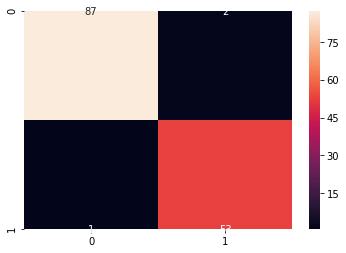

In [30]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [38]:
#Saving model to disk
pickle.dump(classifier, open("ANNPrac1.pkl", "wb"))


In [39]:
#Loading Model to compare results
ANNPrac1 = pickle.load(open("ANNPrac1.pkl", "rb"))